# 싸이킷런을 이용한 DTM / TF-IDF

DTM은 단순히 해당 Document 내에서의 term이 몇번 나왔는지 즉 단어를 counting

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "I love you",
    'you know i want your love',
    'what should i do'
]
vector = CountVectorizer() # vector라는 이름으로 객체를 생성 shift+tab을 이용하면 parameter정보 확인 가능

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 1 0 0 0 1 0]
 [0 1 1 0 1 0 1 1]
 [1 0 0 1 0 1 0 0]]
{'love': 2, 'you': 6, 'know': 1, 'want': 4, 'your': 7, 'what': 5, 'should': 3, 'do': 0}


In [17]:
!pip install TfidfVectorizer

ERROR: Could not find a version that satisfies the requirement TfidfVectorizer (from versions: none)
ERROR: No matching distribution found for TfidfVectorizer


한글의 TF-IDF 값을 구하기 위해서는 형태소 분석을 통해 미리 조사 등을 없애고 구해야 정확한 결과를 기대할 수 있다.

- TF 는 해당 문서에서 특정 단어의 빈도수를 가지고 특정 단어의 중요도를 구한다. 하지만 a 와 같은 관사(불용어)로 인한 한계점이 존재한다.

- 이러한 단어들에 있어서 패널티를 주기 위해 IDF라는 개념을 사용
- 로그안에서 총 문장의 개수를 단어가 출현한 문장의 개수로 나눠준 값

- TF IDF는 어떠한 문서가 주어졌을때 각 단어별로 그 문장의 연관성을 수치로 나타낸 값

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    '품질 정말 대박',
    '써보니 품질 믿을만 하네요',
    '품질도 좋은데 서비스도 좋아요',

]
tfidfv = TfidfVectorizer().fit(corpus)

print(tfidfv.vocabulary_)
print(tfidfv.transform(corpus).toarray()) # 배열로 변환

{'품질': 7, '정말': 4, '대박': 0, '써보니': 3, '믿을만': 1, '하네요': 9, '품질도': 8, '좋은데': 6, '서비스도': 2, '좋아요': 5}
[[0.62276601 0.         0.         0.         0.62276601 0.
  0.         0.4736296  0.         0.        ]
 [0.         0.52863461 0.         0.52863461 0.         0.
  0.         0.40204024 0.         0.52863461]
 [0.         0.         0.5        0.         0.         0.5
  0.5        0.         0.5        0.        ]]


# 불용어 지정 Stop_words

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'I love you',
    'you know i want your love',
    'what should i do'
]
tfidfv = TfidfVectorizer(stop_words={'do'}).fit(corpus) # stop_words를 통해 불용어 지정 가능

print(tfidfv.vocabulary_)
print(tfidfv.transform(corpus).toarray()) # 배열로 변환

{'love': 1, 'you': 5, 'know': 0, 'want': 3, 'your': 6, 'what': 4, 'should': 2}
[[0.         0.70710678 0.         0.         0.         0.70710678
  0.        ]
 [0.49047908 0.37302199 0.         0.49047908 0.         0.37302199
  0.49047908]
 [0.         0.         0.70710678 0.         0.70710678 0.
  0.        ]]


# 문서 유사도

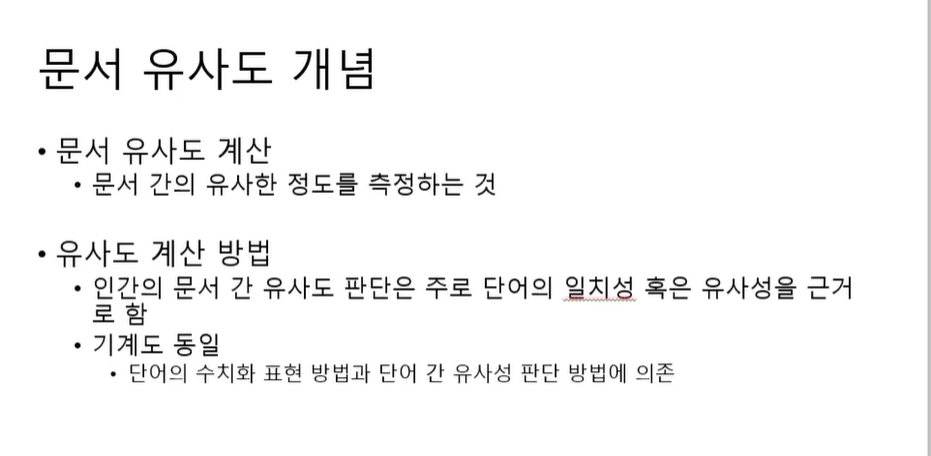

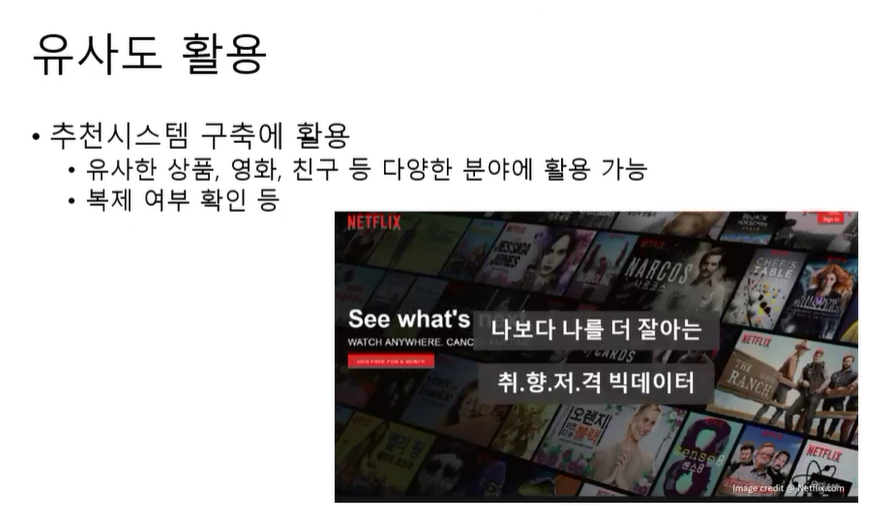

- txt에는 일반적으로 개인의 취향이나 성향이 드러남
- 그 기호를 바탕으로 유사한 기호를 가진 사람들이 만족한 상품이나 서비스를 추천 가능
- 영화도 마찬가지로 유사도를 활용하여(리뷰, 영화 줄거리) 영화 추천 가능
- 표절검사, 카피킬러 등등에 활용 가능

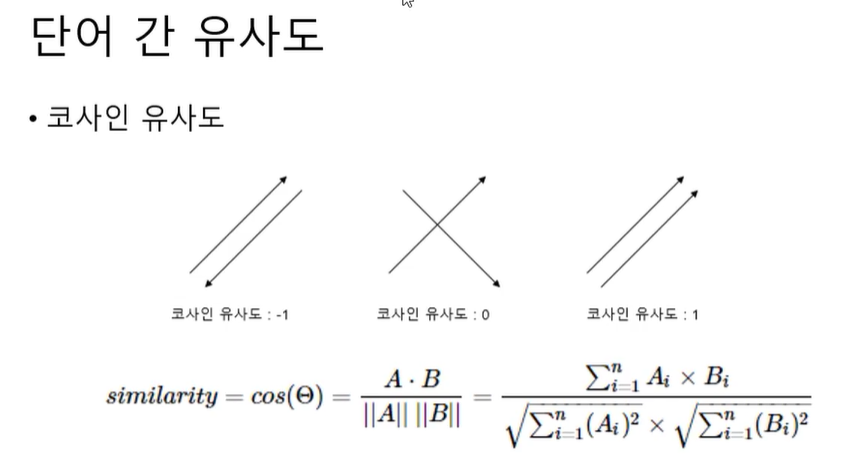

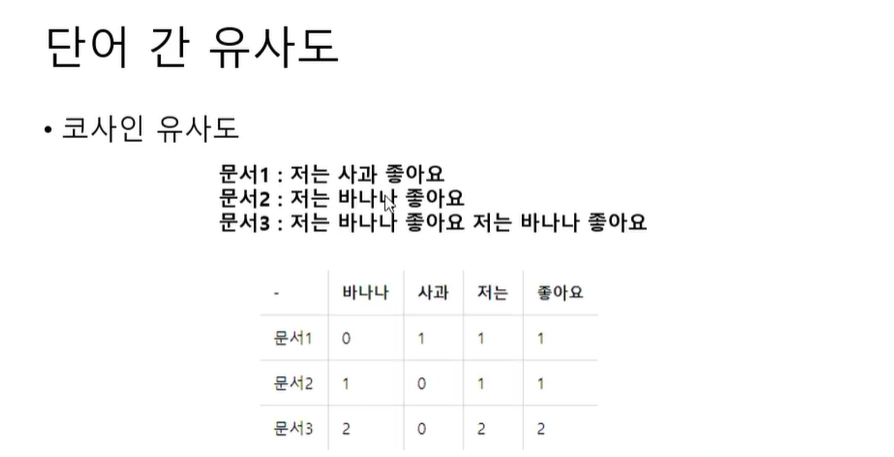

- 3개의 문장을 통해 주요 키워드를 중심으로 DTM을 구하면 위의 매트릭스가 생성
- 칼럼에 들어가는 단어는 4개

# Similarity

In [1]:
from numpy import dot # 행렬 연산
from numpy.linalg import norm # vector의 길이
import numpy as np
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B)) # 행렬 곱 / 벡터의 길이

In [2]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

In [3]:
print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2와 문서3의 코사인 유사도
## doc2와 doc3의 유사도가 1인 의미?

0.6666666666666667
0.6666666666666667
1.0000000000000002


문서2와 문서3이 완전히 일치한다는 뜻

규모는 달랐지만 나도는 단어들의 종류면에서는 같았다

실제로 같은 문장이 반복됨

# Sckit-Learn의 text 특징 추출과 벡터화를 통한 유사도 측정

### 1.CountVectorizer

In [67]:
import pandas as pd
pd.options.mode.chained_assignment = None # 처리속도 증가

import numpy as np
np.random.seed(0)

from konlpy.tag import Okt # 형태소 분석기
okt = Okt()

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # Tfidf vectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity # cosine 유사도 측정

# tokenizer : 문장에서 색인어 추출을 위해 명사, 동사, 알파벳, 숫자 정도의 단어만 뽑아서 normalization, stemming
def tokenizer(raw, pos=["Noun", "Alpha", "Verb", "Number"], stopword=[]):
    return [
        word for word, tag in okt.pos(
        raw,
        norm=True, #  normalize 그랰ㅋㅋ -> 그래ㅋㅋ
        stem=True  # stemming 바뀌니 -> 바뀌다 / 동사의 기본형을 뜯어냄
        )
        if len(word) > 1 and tag in pos and word not in stopword
    ]

# 테스트 문장
rawdata = [
    '남북 고위급 회담 대표단 확정..남북 해빙모드 급물살',
    '[남북 고위급 회담]장차관만 6명..판 커지는 올림픽 회담',
    
    '문재인 대통령과 대통령의 영부인 김정숙여사 내외의 동반 1987 관람 후 인터뷰',
    '1987 본 문 대통령.."그런다고 바뀌나? 함께 하면 바뀐다."',
    
    '이명박 전 대통령과 전 대통령의 부인 김윤옥 여사, 그리고 전 대통령의 아들 이시형씨의 동반 검찰출석'
]

In [69]:
vectorize = CountVectorizer(
    tokenizer=tokenizer,
    min_df=2                    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시
                                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                                # min_df = f0 : 문서에 10개 미만으로 나타나는 단어 무시
                                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)

# 문장에서 노출되는 feature(특징이 될만한 단어) 수를 합한 Document Term Matrix(이하 DTM) 을 리턴
X = vectorize.fit_transform(rawdata)

print(X.toarray())

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()
print(features)

# DTM 구축

[[0 1 2 0 0 0 1]
 [0 1 1 0 0 0 2]
 [1 0 0 2 1 1 0]
 [1 0 0 1 0 0 0]
 [0 0 0 3 1 1 0]]
['1987', '고위', '남북', '대통령', '동반', '여사', '회담']


In [ ]:
# 검색하고자 하는 키워드

In [72]:
srch = [t for t in tokenizer('1987 관람한 대통령 인터뷰 기사') if t in features]
print(srch)
# ['1987', '대통령']

# dtm 에서 검색하고자 하는 feature만 뽑아낸다.
srch_dtm = np.asarray(X.toarray())[:, [
    # vectorize.vocabulary_get 은 특정 feature가 dtm에서 가지고 있는 index값 리턴
    vectorize.vocabulary_.get(i) for i in srch
]]

['1987', '대통령']


In [73]:
# 1987과 대통령으로 구성되어 있는 새로운 DTM
srch_dtm

array([[0, 0],
       [0, 0],
       [1, 2],
       [1, 1],
       [0, 3]], dtype=int64)

In [75]:
score = srch_dtm.sum(axis=1)
print(score)
# array([0,0,3,2,3], dtype=int64) 문장별 feature 합계 점수

for i in score.argsort()[::-1]:
    if score[i] > 0:
        print('{}/ score : {}'.format(rawdata[i], score[i]))

[0 0 3 2 3]
이명박 전 대통령과 전 대통령의 부인 김윤옥 여사, 그리고 전 대통령의 아들 이시형씨의 동반 검찰출석/ score : 3
문재인 대통령과 대통령의 영부인 김정숙여사 내외의 동반 1987 관람 후 인터뷰/ score : 3
1987 본 문 대통령.."그런다고 바뀌나? 함께 하면 바뀐다."/ score : 2


- 3, 5번의 document가 가장 유사도가 높다고 나옴

dtm을 기반으로 문장유사도를 계산해 여러 문서 중 가장 유사도가 높은 문서를 보여주는 예제

# 2. TfidfVectorizer

In [78]:
vectorize = TfidfVectorizer(
    tokenizer = tokenizer,
    min_df=2,

    sublinear_tf=True   # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)
X = vectorize.fit_transform(rawdata)

print(
    'fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1])
)
# fit_transform, (sentence 5, feature 7)

print(X.toarray())

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

fit_transform, (sentence 5, feature 7)
[[0.         0.45329466 0.76749457 0.         0.         0.
  0.45329466]
 [0.         0.45329466 0.45329466 0.         0.         0.
  0.76749457]
 [0.44832087 0.         0.         0.63009934 0.44832087 0.44832087
  0.        ]
 [0.76944707 0.         0.         0.63871058 0.         0.
  0.        ]
 [0.         0.         0.         0.77637396 0.44566999 0.44566999
  0.        ]]


In [79]:
print(features)

['1987', '고위', '남북', '대통령', '동반', '여사', '회담']


In [87]:
# 검색 문장에서 feature를 뽑아냄
srch=[t for t in tokenizer('1987 관람한 대통령 인터뷰 기사') if t in features]
print(srch)
# ['1987', '대통령']

# dtm에서 검색하고자 하는 feature만 뽑아낸다.
srch_dtm = np.asarray(X.toarray())[:,[
    # vectorize.vocabulary_.get 은 특정 feature가 dtm 에서 가지고 있는 index값을 리턴한다.
    vectorize.vocabulary_.get(i) for i in srch
]]
   
#       ['1987', '대통령']
#      [0.        , 0.        ],
#       [0.        , 0.        ],
#       [0.44832087, 0.63009934],
#       [0.76944707, 0.63871058],
#       [0.        , 0.77637396]

score = srch_dtm.sum(axis=1)
print(score)
# [0.         0.         1.07842022 1.40815765 0.77637396]

for i in score.argsort()[::-1]:
    if score[i] > 0:
        print('{}/ score : {}'.format(rawdata[i], score[i]))

['1987', '대통령']
[0.         0.         1.07842022 1.40815765 0.77637396]
1987 본 문 대통령.."그런다고 바뀌나? 함께 하면 바뀐다."/ score : 1.408157650537996
문재인 대통령과 대통령의 영부인 김정숙여사 내외의 동반 1987 관람 후 인터뷰/ score : 1.0784202177170614
이명박 전 대통령과 전 대통령의 부인 김윤옥 여사, 그리고 전 대통령의 아들 이시형씨의 동반 검찰출석/ score : 0.7763739568837855


- count기법과는 달리 tf-idf값을 기준으로 하여 오히려 4번째 문서의 값이 가장 높다

- 단수히 count만 가지고 하는것 보다는 수치적으로 좀 더 세밀한 결과가 나온다

# 단어 표현방법 Word2Vec

- 단어를 벡터형태로 나타낸 모델

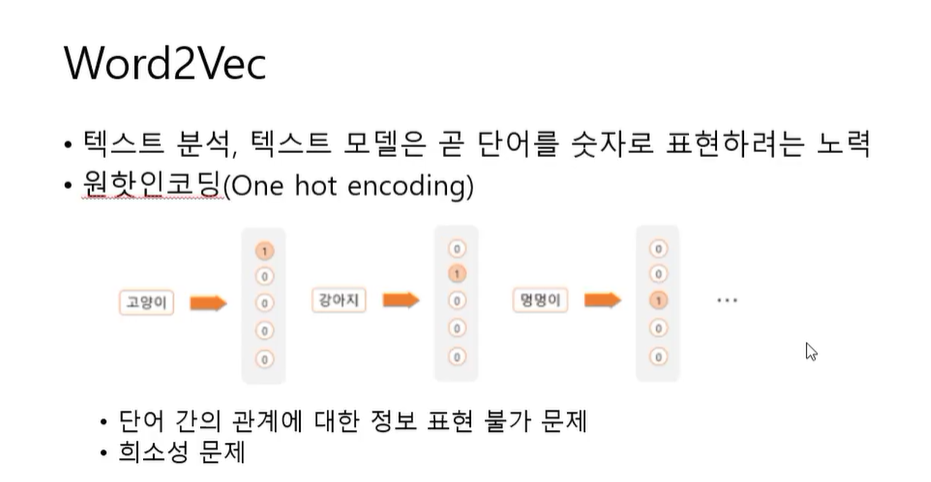

단어의 집합의 크기를 벡터의 차원으로 만들고 표현하고 싶은 단어의 인덱스 값에만 1을 표현

문제는 단어와 단어간에 가질 수 있는 정보의 표현은 불가능하다 

강아지와 멍멍이는 비슷한 단어이지만 벡터값이 다름

특정 단어의 값은 1이지만 나머지 값은 모두 0이 되기에 희소성 문제 발생

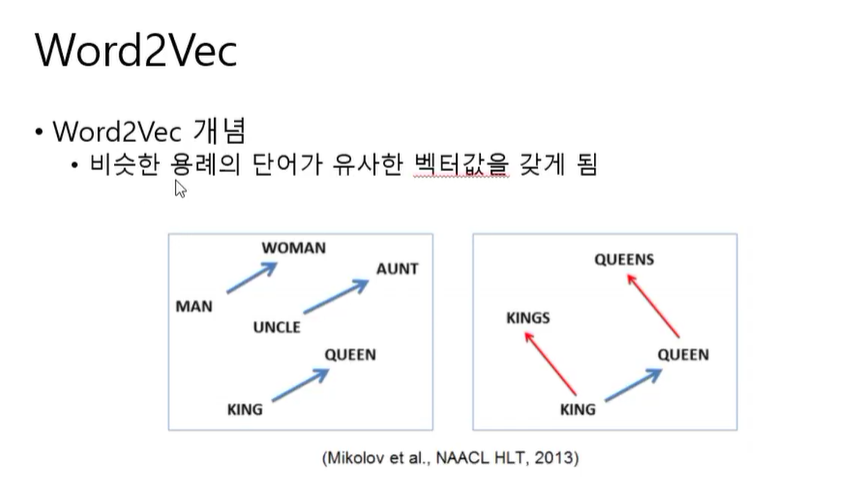

- 비슷한 사용 케이스를 갖는 데이터가 유사한 벡터값을 가지게 함
- 마치 queen에서 king을 빼면 queens에서 kings를 뺀것과 같다.
-  이러한 연산이 가능하도록 하는것이 word2vec

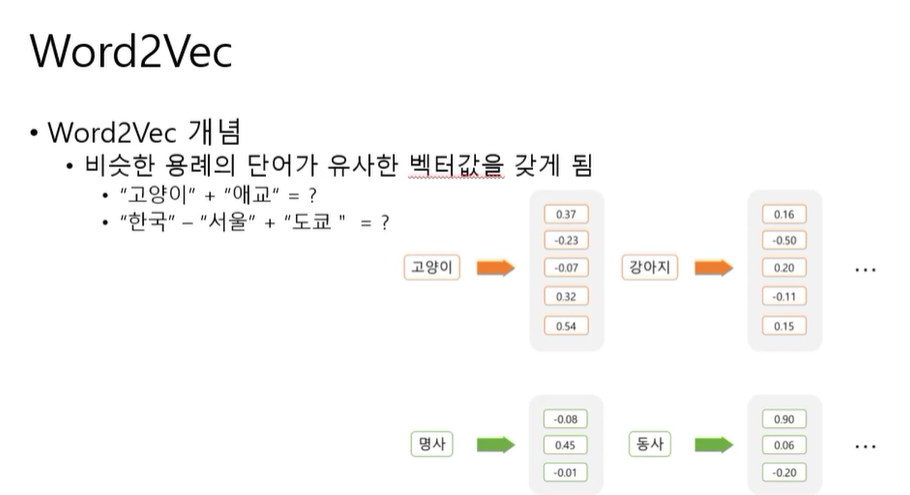

- word2vec은 원핫인코딩과 다르게 n차원에 대해서 특정 단어가 일정한 값을 가짐
- 비슷한 용례를 가진 단어들은 유사한 벡터값을 가지는 특징

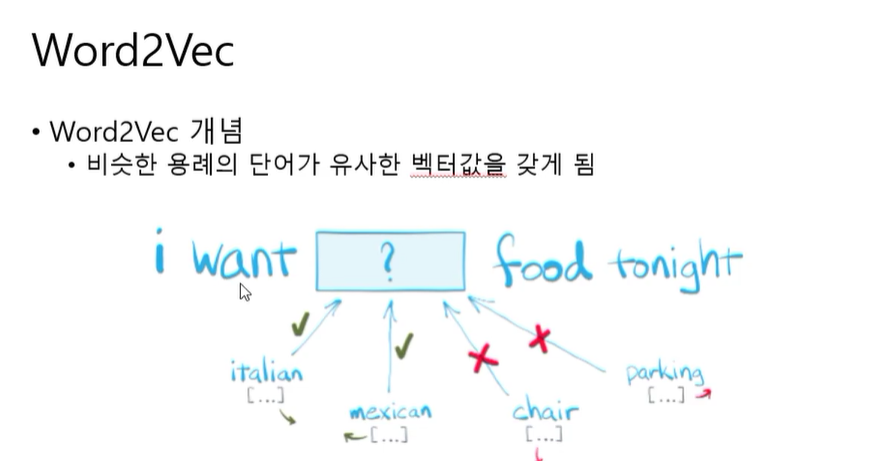

- 박스에 들어갈 부분은 비슷한 용례이기에 유사한 주변어를 갖는 단어를 비슷한 벡터값을 갖게 함
- 그에 대한 판단은 서로 비슷한 양쪽의 단어들을 가질 확률이 클수록 큰 벡터값을 가짐

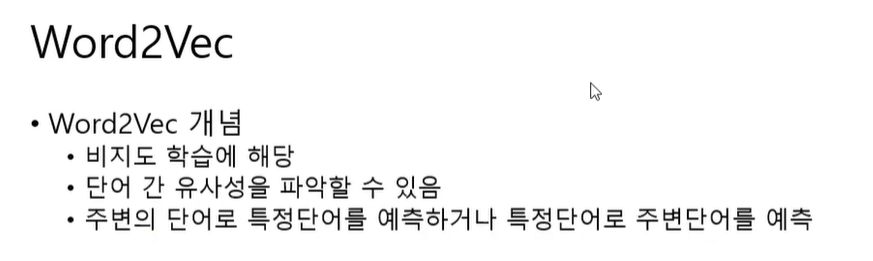

# 그래프 예제

In [6]:
from gensim.models import Word2Vec

# 형태소 분석 완료
sentences = [
                ['this', 'is','a','good','product'],
                ['it', 'is','a', 'excellent','product'],
                ['it','is','a', 'bad', 'product'],
                ['that', 'is', 'the', 'worst', 'product']
            ]


# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

# 단어 벡터를 구한다.
word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

# 단어간 유사도를 확인한다.
print(word_vectors.similarity(w1='that',w2='product')) # 유사성은 높지 않다
print(word_vectors.similarity(w1='good',w2='excellent'))
print(word_vectors.similarity(w1='worst',w2='bad'))

0.0850444
-0.04770057
-0.048452776


- 단어의 개수가 차원 즉, 그래프를 그리기 위해선 2차원으로 차원을 축소시켜야함

In [2]:
print(vocabs)

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2개의 차원으로 축소
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

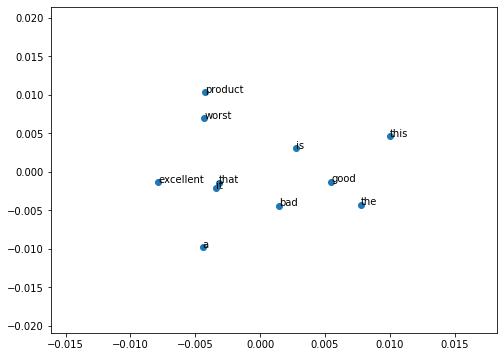

In [8]:
# 단어와 2차원 X축의 값, Y축으로 2차원 그래프를 그린다.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, marker = 'o')
for i,v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))

사용된 문장이 적어 제대로 정교한 기대를 하기는 어려웠다.

# 영화 리뷰 예제

##### 인터스텔라 리뷰 데이터 크롤링

In [9]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time

pre = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=45290&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=highest&page="

review = []
rate = []

cnt = 0

for i in range(1,4890, 5): # 약 만개의 데이터
    time.sleep(0.1)  # IP가 차단되지 않도록 time.sleep을 통해 쉬어주도록 함
    cnt = cnt +1
    url = pre + str(i)
    res = requests.get(url)
    soup = BeautifulSoup(res.content,'html.parser')
    
    print(cnt)
    
    id_list = []
    id_pre = "_filtered_ment_"

    for i in range(10):
        id_list.append(id_pre+str(i))

    for id in id_list:
        review.append(soup.find("span", {"id":id}).get_text().strip())

        rate_list = []
        rate_list = (soup.select("div.star_score > em"))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)
        
df = pd.DataFrame({"review" : review, "rate" : rate})

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [10]:
df.to_csv('review.csv')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

train_data = pd.read_csv("review.csv")
train_data[:5] # 상위 5개 출력

,Unnamed: 0,review,rate
0,0,마블 3000만큼 사랑합니다,10
1,1,Avengers Assemble!,10
2,2,I'm Ironman.,10
3,3,아이언맨으로 시작해서 아이언맨으로 끝난다..,10
4,4,아스가디언즈 오브 갤럭시 벌써부터 기대됨 ㅋㅋㅋㅋ,10


## 결측치 제거

In [6]:
train_data = train_data.dropna(how='any') # Null값이 존재하는 행 제거
print(train_data.isnull().values.any())  # Null값이 존재하는지 확인

False


In [7]:
train_data['review'] = train_data['review'].str.replace("[^ㄱ-하-ㅣ가-힣]","") # 한글이 아니면 전부 제거
train_data[:5] # 상위 5개 출력

,Unnamed: 0,review,rate
0,0,마블만큼사랑합니다,10
1,1,,10
2,2,,10
3,3,아이언맨으로시작해서아이언맨으로끝난다,10
4,4,아스가디언즈오브갤럭시벌써부터기대됨ㅋㅋㅋㅋ,10


In [8]:
# 불용어 지정
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []

for sentence in train_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
    print("=>",end="")

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>

=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>

In [9]:
tokenized_data

[['마블', '만큼', '사랑'],
 [],
 [],
 ['아이언맨', '시작', '아이언맨', '끝나다'],
 ['아스', '가디언즈', '오브', '갤럭시', '벌써', '부터', '기대', '되다', 'ㅋㅋㅋㅋ'],
 ['히어로', '물', '보다', '누가', '알다'],
 ['인피니티',
  '워',
  '가년',
  '을',
  '무너',
  '뜨다',
  '리',
  '영화',
  '라면',
  '엔드게임',
  '년',
  '을',
  '돌아보다',
  '영화',
  '이다'],
 ['쥐다', '살리다', 'ㅋㅋㅋㅋ'],
 ['마지막', '타', '에서', '싸다'],
 ['점안', '주다', '사람', '마블', '에서까지', '밖에', '애정', '없다'],
 ['아이언맨', '시', '작', '해', '아이언맨', '끝나다', '대장정'],
 ['마블', '시대', '살', '게', '해주다', '감사하다'],
 ['다음', '아이언맨', '아이언맨', '에나', '온', '꼬마', '애', '구나'],
 ['아이언맨',
  '부터',
  '본',
  '사람',
  '알다',
  '이영화',
  '그동안',
  '본',
  '모든',
  '걸',
  '보상',
  '받다',
  '영화',
  '라',
  '는걸'],
 ['감히',
  '내',
  '가평',
  '가하다',
  '수준',
  '영화',
  '아니다',
  '다점',
  '부족하다',
  '별점',
  '만큼',
  '준비',
  '해주다',
  'ㅠㅠ'],
 ['들쥐',
  '양자역학',
  '기계',
  '버튼',
  '을',
  '누르다',
  '확률',
  '세상',
  '을',
  '살리다',
  '확률',
  '만',
  '크다'],
 ['엔드게임', '이라는', '부제', '누가', '붙다', '혔', '늘다', '모르다', '진짜', '완벽하다'],
 ['옆', '여자', '입', '틀어막다', '보더', '라', '물론', '나다', '막다', '봄'],
 [

리뷰의 최대 길이 : 49
리뷰의 평균 길이 : 7.679355488418932


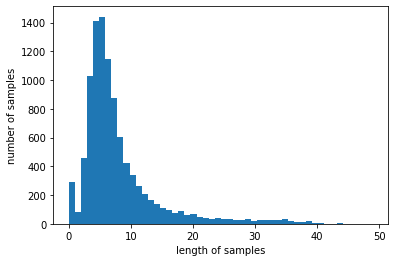

In [10]:
# 리뷰 길이 분포 확인
print("리뷰의 최대 길이 :",max(len(I) for I in tokenized_data))
print("리뷰의 평균 길이 :",sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(1626, 100)

In [15]:
print(model.wv.most_similar("아이언맨"))

[('천', 0.9986046552658081), ('마블', 0.9976634979248047), ('ㅠㅠ', 0.9974679946899414), ('어벤져스', 0.9951594471931458), ('영원하다', 0.9950809478759766), ('ㅜㅜ', 0.9947223663330078), ('네', 0.9917707443237305), ('어', 0.9911761283874512), ('ㅠ', 0.9899938702583313), ('로다주', 0.9897936582565308)]


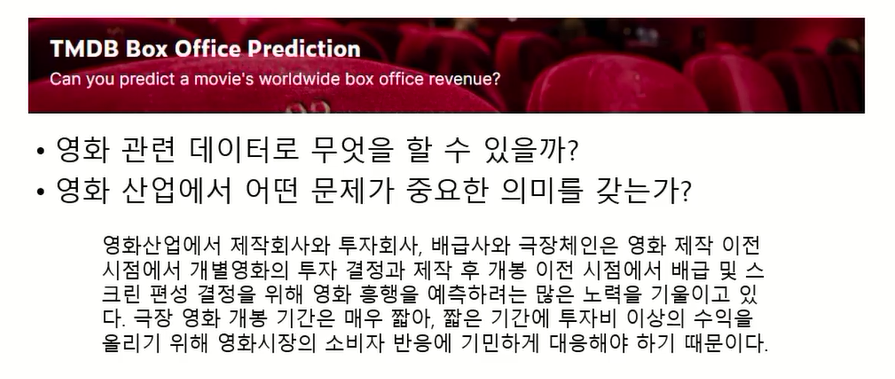

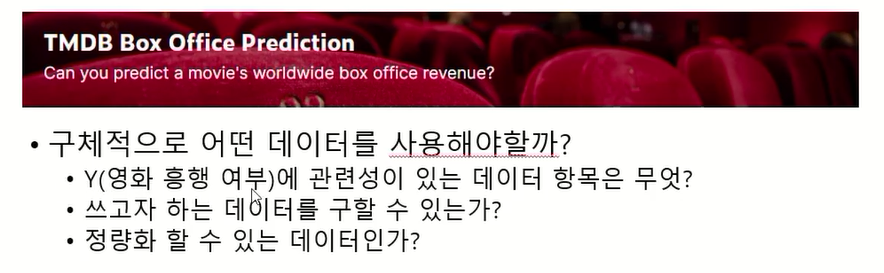

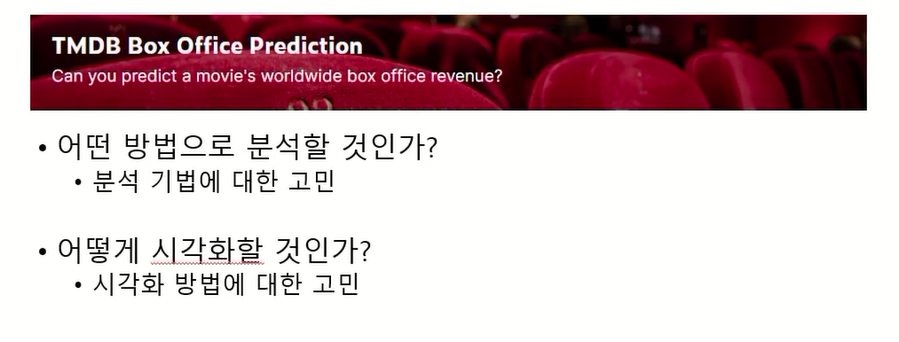

- 가치있는 문제 발굴
- 다양한 데이터 소스
- 적절한 분석 기법
- 시각화 방법

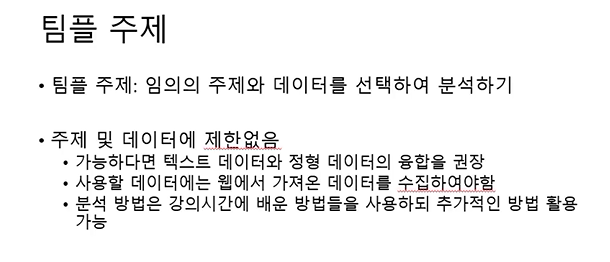

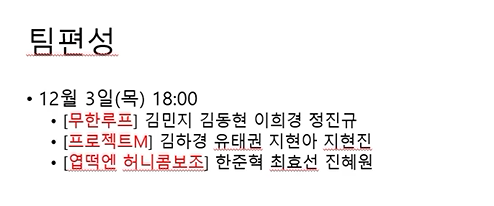

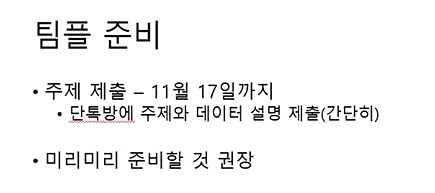

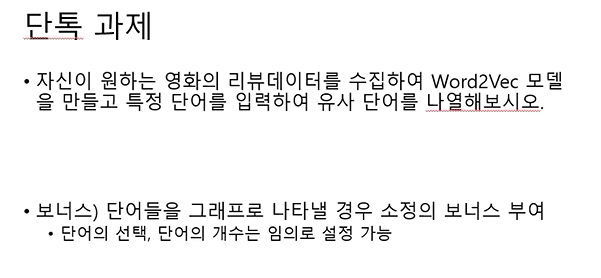

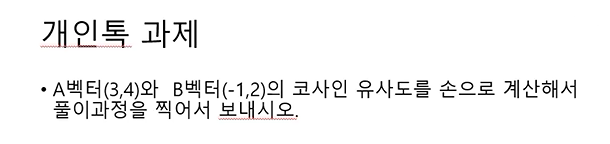